In [4]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 52.0 MB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 5.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
powerlaw 1.5 requires mpmath, which is not installed.
powerlaw 1.5 requires scipy, which is not installed.
scikit-mobility 1.3.1 requires scikit-learn, which is not installed.


In [2]:
def fetch_daily_log_counts():
    query = """
    SELECT
        uuid,
        logtime::date AS log_date,
        COUNT(*) AS log_count
    FROM
        blogwatcher.gps_logs
    WHERE
        logtime BETWEEN '2023-07-22' AND '2023-08-22'
    GROUP BY
        uuid, logtime::date
    ORDER BY
        log_date;
    """
    
    # Connect to PostgreSQL database
    conn = psycopg2.connect(
        dbname = "gisdb", # "bw_tokyo/bw_ishikawa" 
        user = "postgres",
        password =  "task4TH",
        host = "localhost",
        port = '5432', 
    )
    
    # Execute the query and fetch the data
    df = pd.read_sql(query, conn)
    
    # Close the connection
    conn.close()
    
    return df

In [3]:
# Fetch the daily log counts
df_daily_log_counts = fetch_daily_log_counts()

/tmp/ipykernel_527115/728449934.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
df_daily_log_counts[df_daily_log_counts['log_count']<20]

,uuid,log_date,log_count
0,00000562-e2e7-6045-eb44-46576170aa6a,2023-07-22,13
1,00000696-cbe8-03a6-62ed-9098758cf861,2023-07-22,1
3,00000d94-2fba-44f4-3e25-0727e2600fe6,2023-07-22,15
4,00003fa4-bcdb-9876-e218-5f6c9f7cf846,2023-07-22,1
6,00006e4d-3993-ec90-a225-7c8b448e0fbc,2023-07-22,7
...,...,...,...
23010583,fd947a32-ee0e-73ea-4e02-bd66a8503347,2023-08-22,1
23010584,fdf7762d-4ef9-988e-3229-273f1924abd7,2023-08-22,1
23010585,fe21a2df-d75b-fe82-d948-d63b7469c056,2023-08-22,1
23010586,fe21e9e9-87e4-2493-8647-79f98b78798a,2023-08-22,1


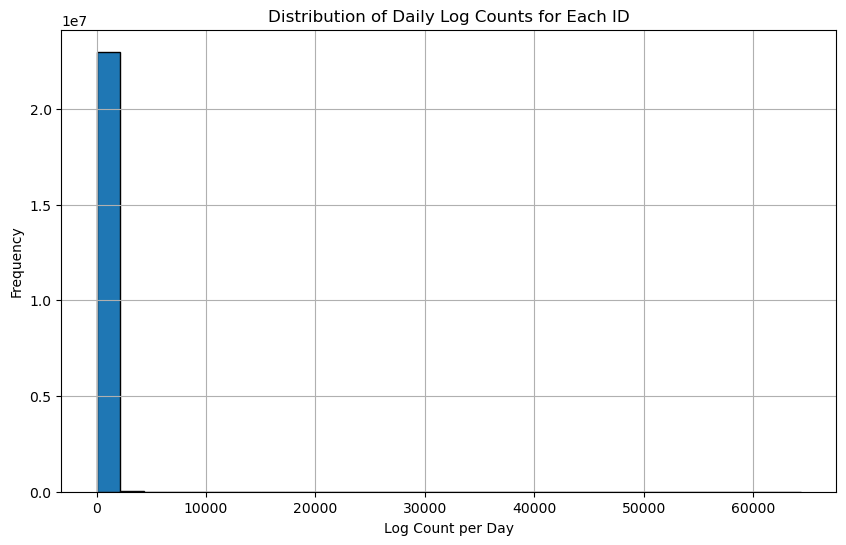

In [6]:
import matplotlib.pyplot as plt

# Plot the histogram of daily log counts
plt.figure(figsize=(10, 6))
plt.hist(df_daily_log_counts['log_count'], bins=30, edgecolor='black')
plt.xlabel('Log Count per Day')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Log Counts for Each ID')
plt.grid(True)
plt.show()

In [6]:
def fetch_active_id_stats():
    query = """
    WITH daily_log_counts AS (
        SELECT
            uuid,
            logtime::date AS log_date,
            COUNT(*) AS log_count
        FROM
            blogwatcher.gps_logs
        GROUP BY
            uuid, logtime::date
    ),
    active_ids AS (
        SELECT
            uuid,
            log_date
        FROM
            daily_log_counts
        WHERE
            log_count >= 20
    )
    SELECT
        log_date,
        COUNT(DISTINCT uuid) AS active_id_count,
        (COUNT(DISTINCT uuid) * 1.0 / (SELECT COUNT(DISTINCT uuid) FROM blogwatcher.gps_logs)) AS active_id_ratio
    FROM
        active_ids
    GROUP BY
        log_date
    ORDER BY
        log_date;
    """
    
    # Connect to PostgreSQL database
    conn = psycopg2.connect(
        dbname = "gisdb", # "bw_tokyo/bw_ishikawa" 
        user = "postgres",
        password =  "task4TH",
        host = "localhost",
        port = '5432', 
    )
    
    # Execute the query and fetch the data
    df = pd.read_sql(query, conn)
    
    # Close the connection
    conn.close()
    
    return df

In [9]:
# Fetch the active ID statistics
df_active_id_stats = fetch_active_id_stats()
df_active_id_stats

/tmp/ipykernel_855353/2671329648.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,log_date,active_id_count,active_id_ratio
0,2023-07-22,414497,0.172709
1,2023-07-23,395587,0.164829
2,2023-07-24,451757,0.188234
3,2023-07-25,453004,0.188753
4,2023-07-26,450640,0.187768
5,2023-07-27,450248,0.187605
6,2023-07-28,455616,0.189842
7,2023-07-29,414535,0.172724
8,2023-07-30,392696,0.163625
9,2023-07-31,447943,0.186645


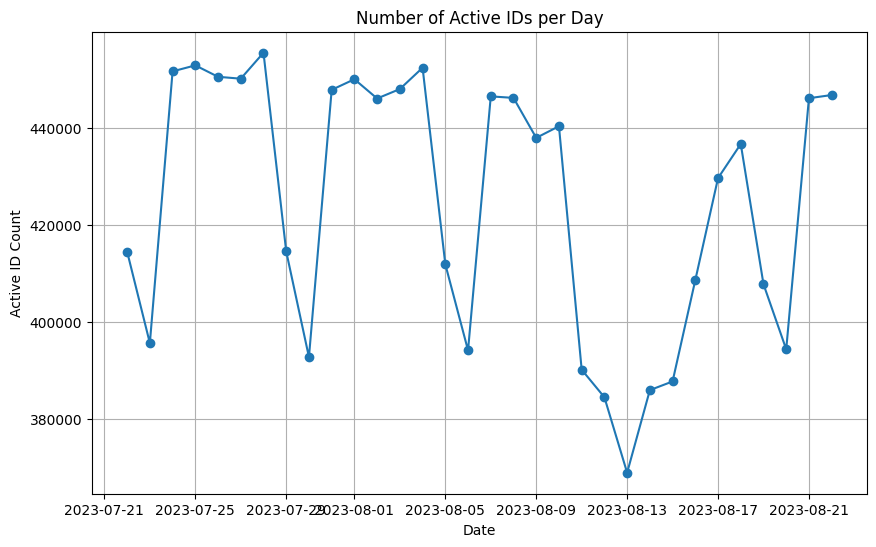

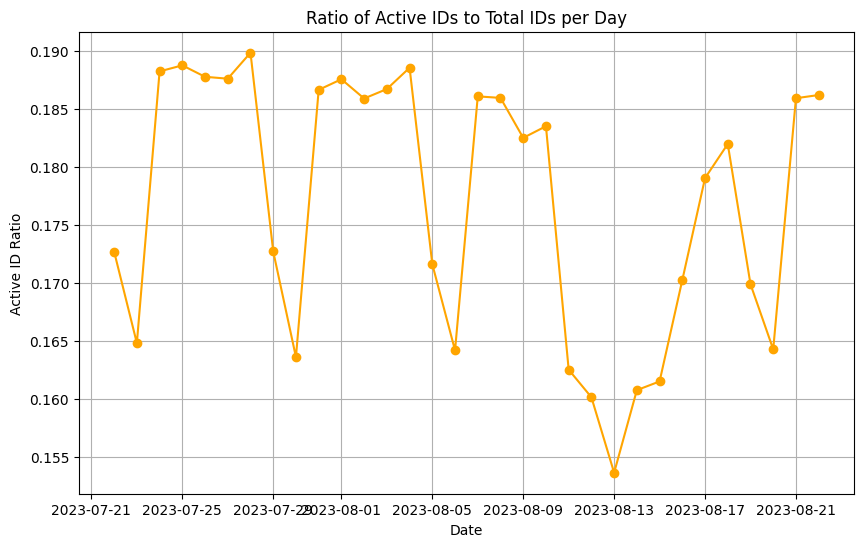

In [8]:
# Visualize the number of active IDs per day
plt.figure(figsize=(10, 6))
plt.plot(df_active_id_stats['log_date'], df_active_id_stats['active_id_count'], marker='o')
plt.xlabel('Date')
plt.ylabel('Active ID Count')
plt.title('Number of Active IDs per Day')
plt.grid(True)
plt.show()

# Visualize the ratio of active IDs to total IDs
plt.figure(figsize=(10, 6))
plt.plot(df_active_id_stats['log_date'], df_active_id_stats['active_id_ratio'], marker='o', color='orange')
plt.xlabel('Date')
plt.ylabel('Active ID Ratio')
plt.title('Ratio of Active IDs to Total IDs per Day')
plt.grid(True)
plt.show()

In [2]:
def create_active_id_logs_table():
    query = """
    CREATE TABLE active_id_logs AS
    WITH daily_log_counts AS (
        SELECT
            uuid,
            logtime::date AS log_date,
            COUNT(*) AS log_count
        FROM
            blogwatcher.gps_logs
        GROUP BY
            uuid, logtime::date
    ),
    active_ids AS (
        SELECT
            uuid
        FROM
            daily_log_counts
        WHERE
            log_count >= 20
        GROUP BY
            uuid
    )
    SELECT
        uuid,
        logtime,
        accuracy,
        ios,
        geom
    FROM
        blogwatcher.gps_logs
    WHERE
        uuid IN (SELECT uuid FROM active_ids);
    """
    
    # Connect to PostgreSQL database
    conn = psycopg2.connect(
        dbname = "gisdb", # "bw_tokyo/bw_ishikawa" 
        user = "postgres",
        password =  "task4TH",
        host = "localhost",
        port = '5432', 
    )
    
    # Execute the query to create the table
    with conn.cursor() as cursor:
        cursor.execute(query)
    
    # Commit the transaction
    conn.commit()
    
    # Close the connection
    conn.close()

In [3]:
# Create the new table
create_active_id_logs_table()

DiskFull: could not extend file "base/24596/1723718.124": No space left on device
HINT:  Check free disk space.


In [5]:
import psycopg2
import pandas as pd
from skmob import TrajDataFrame
from skmob.preprocessing import detection
import matplotlib.pyplot as plt

def fetch_weekly_data():
    query = """
    WITH daily_log_counts AS (
        SELECT
            uuid,
            logtime::date AS log_date,
            COUNT(*) AS log_count
        FROM
            blogwatcher.gps_logs
        WHERE
            logtime BETWEEN '2023-07-22' AND '2023-07-28'
        GROUP BY
            uuid, logtime::date
    ),
    active_users AS (
        SELECT
            uuid,
            log_date
        FROM
            daily_log_counts
        WHERE
            log_count > 20
    )
    SELECT
        uuid,
        logtime,
        accuracy,
        ios,
        geom
    FROM
        blogwatcher.gps_logs
    WHERE
        logtime::date BETWEEN '2023-07-22' AND '2023-07-28'
        AND uuid IN (SELECT uuid FROM active_users);
    """
    
    # Connect to PostgreSQL database
    conn = psycopg2.connect(
        dbname = "gisdb", # "bw_tokyo/bw_ishikawa" 
        user = "postgres",
        password =  "task4TH",
        host = "localhost",
        port = '5432', 
    )
    
    # Execute the query and fetch the data
    df = pd.read_sql(query, conn)
    
    # Close the connection
    conn.close()
    
    return df



In [ ]:
# Fetch the data for the week of 2023-07-22 to 2023-07-28
df_weekly = fetch_weekly_data()

/tmp/ipykernel_6666/3077329146.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [ ]:
# Convert the data into a TrajDataFrame required by scikit-mobility
df_weekly['datetime'] = pd.to_datetime(df_weekly['logtime'])  # Ensure correct datetime format
df_weekly['lat'] = df_weekly['geom'].apply(lambda x: x.y)  # Assuming geom is of type POINT
df_weekly['lng'] = df_weekly['geom'].apply(lambda x: x.x)  # Assuming geom is of type POINT
tdf = TrajDataFrame(df_weekly, user_id='uuid', timestamp=True, latitude='lat', longitude='lng')

# Calculate stay locations using scikit-mobility's detection function
stay_locs_by_day = {}

for day in pd.date_range('2023-07-22', '2023-07-28'):
    tdf_day = tdf[tdf['datetime'].dt.date == day.date()]
    if not tdf_day.empty:
        stay_locs = detection.stay_locations(tdf_day, minutes_for_a_stay=10, spatial_radius_km=0.2)
        stay_locs_by_day[day.date()] = stay_locs.groupby('uid').size()  # Count stay locations by user
